In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy import stats
from scipy.stats import norm, skew, kurtosis, shapiro, chisquare, gaussian_kde, kstest
import statsmodels.api as sm

In [3]:
dataset = datasets.load_iris()

ext_target = dataset.target[:, None]
iris_data_frame = pd.DataFrame(
    np.concatenate((dataset.data, ext_target, dataset.target_names[ext_target]), axis=1),
    columns=dataset.feature_names + ['target label', 'target name'])
iris_data_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target label,target name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [4]:
setosa_sepallen = iris_data_frame.loc[iris_data_frame['target name'] == 'setosa']['sepal length (cm)'].astype(float)

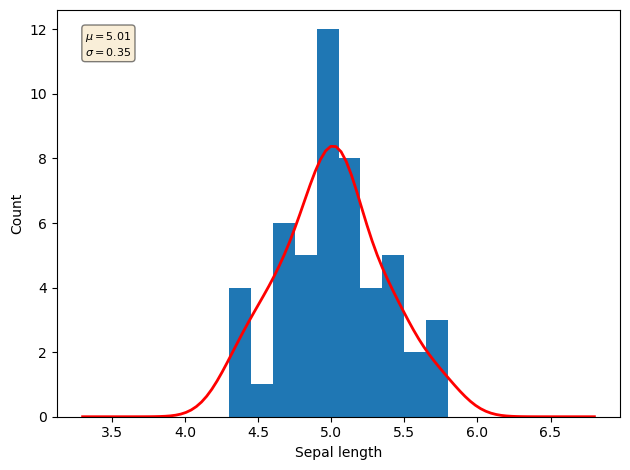

In [8]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(setosa_sepallen.to_numpy(), bins=10)
textstr = '\n'.join((
    r'$\mu=%.2f$' % (setosa_sepallen.mean()),
    r'$\sigma=%.2f$' % (setosa_sepallen.std())))
#y = ((1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * (1 / mean * (setosa_sepallen.to_numpy() - mean))**2))
#ax.plot(setosa_sepallen.to_numpy(), y)
density = gaussian_kde(setosa_sepallen)
x=np.linspace(min(setosa_sepallen)-1, max(setosa_sepallen)+1, 100)
big_centers = 0.5*(bins[:-1] + bins[1:])
scaling_factor = len(setosa_sepallen)*(bins[1]-bins[0])
ax.plot(x, density(x)*scaling_factor, color='red', linewidth=2)
ax.set_ylabel('Count')
ax.set_xlabel('Sepal length')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=8,
        verticalalignment='top', horizontalalignment='left', bbox=props)
fig.tight_layout()
plt.show()

In [6]:
desc_stats = pd.DataFrame(pd.concat([setosa_sepallen.describe(), 
                        pd.Series(data=setosa_sepallen.median(), index=['median']), 
                        pd.Series(data=setosa_sepallen.mode()[1], index=['mode']),
                        pd.Series(data=skew(setosa_sepallen, bias=False), index=['skewness']), 
                        pd.Series(data=kurtosis(setosa_sepallen, bias=False), index=['kurtosis']) ]), 
                        columns=['sepallen']).T
desc_stats

,count,mean,std,min,25%,50%,75%,max,median,mode,skewness,kurtosis
sepallen,50.0,5.006,0.35249,4.3,4.8,5.0,5.2,5.8,5.0,5.1,0.120087,-0.252689


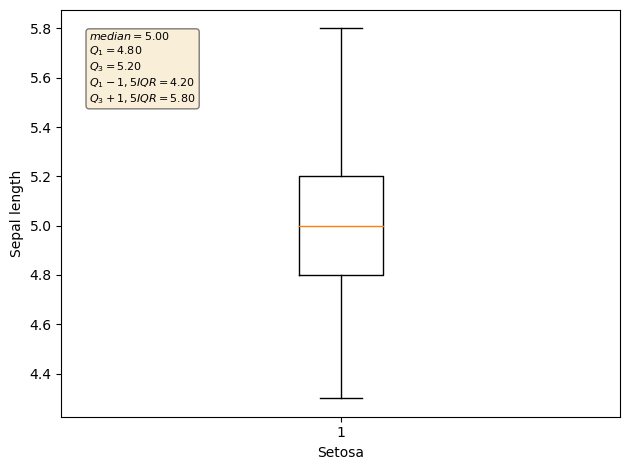

In [9]:
fig, ax = plt.subplots()

ax.boxplot(setosa_sepallen.to_numpy())
Q1 = setosa_sepallen.describe()['25%']
Q3 = setosa_sepallen.describe()['75%']
IQR = Q3-Q1
textstr = '\n'.join((
    r'$median=%.2f$' % (setosa_sepallen.median(), ),
    r'$Q_1=%.2f$' % (Q1, ), 
    r'$Q_3 =%.2f$' % (Q3,), 
    r'$Q_1-1,5IQR =%.2f$' % (Q1-1.5*(IQR)),
    r'$Q_3+1,5IQR =%.2f$' % (Q3+1.5*(IQR))))
ax.set_xlabel('Setosa')
ax.set_ylabel('Sepal length')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
fig.tight_layout()
plt.show()

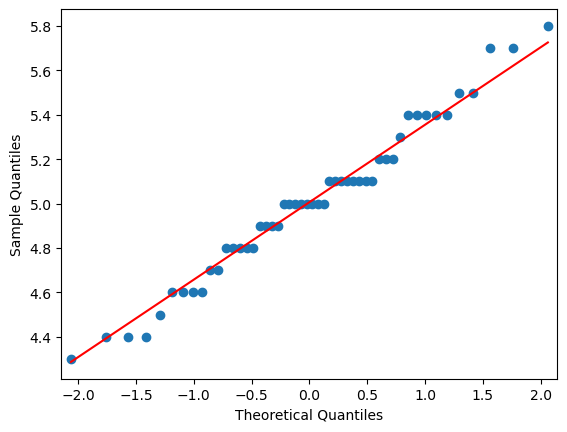

In [8]:
fig = sm.qqplot(setosa_sepallen, line='s')
plt.show()

In [14]:
expected = norm(loc=setosa_sepallen.mean(), scale=setosa_sepallen.std()).rvs(size=50)
print(str(kstest(setosa_sepallen, expected)))
print(str(shapiro(setosa_sepallen)))
print(str(chisquare(f_obs=setosa_sepallen.value_counts(), ddof=0, axis=None)))

KstestResult(statistic=0.18, pvalue=0.3959398631708505, statistic_location=5.1, statistic_sign=1)
ShapiroResult(statistic=0.9776982069015503, pvalue=0.4595010578632355)
Power_divergenceResult(statistic=23.199999999999996, pvalue=0.0570921772726976)


In [16]:
setosa_petallen = iris_data_frame.loc[iris_data_frame['target name'] == 'setosa']['petal length (cm)'].astype(float)
setosa_petallen = pd.concat([setosa_petallen, pd.Series(np.array([10*random.random() for i in range(5)]))], ignore_index=True)
setosa_petallen

0     1.400000
1     1.400000
2     1.300000
3     1.500000
4     1.400000
5     1.700000
6     1.400000
7     1.500000
8     1.400000
9     1.500000
10    1.500000
11    1.600000
12    1.400000
13    1.100000
14    1.200000
15    1.500000
16    1.300000
17    1.400000
18    1.700000
19    1.500000
20    1.700000
21    1.500000
22    1.000000
23    1.700000
24    1.900000
25    1.600000
26    1.600000
27    1.500000
28    1.400000
29    1.600000
30    1.600000
31    1.500000
32    1.500000
33    1.400000
34    1.500000
35    1.200000
36    1.300000
37    1.400000
38    1.300000
39    1.500000
40    1.300000
41    1.300000
42    1.300000
43    1.600000
44    1.900000
45    1.400000
46    1.600000
47    1.400000
48    1.500000
49    1.400000
50    2.602068
51    8.598081
52    8.388875
53    3.545909
54    4.954904
dtype: float64

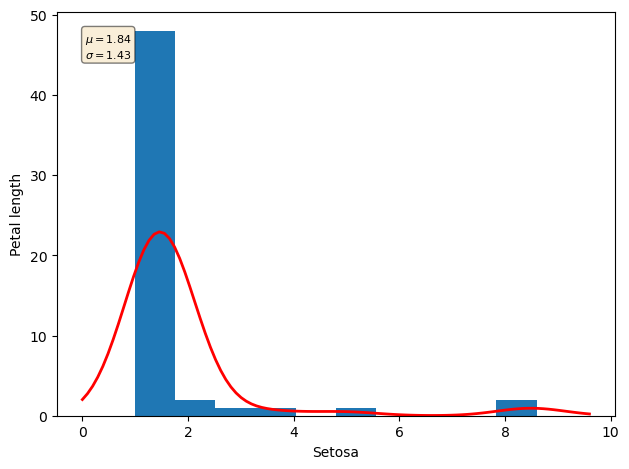

In [18]:
outlier_mean = setosa_petallen.mean()
outlier_var = setosa_petallen.var()
outlier_std = setosa_petallen.std()

fig, ax = plt.subplots()
n, bins, patches = ax.hist(setosa_petallen.to_numpy(), bins=10)
textstr = '\n'.join((
    r'$\mu=%.2f$' % (outlier_mean),
    r'$\sigma=%.2f$' % (outlier_std)))
density = gaussian_kde(setosa_petallen)
x=np.linspace(min(setosa_petallen)-1, max(setosa_petallen)+1, 100)
big_centers = 0.5*(bins[:-1] + bins[1:])
scaling_factor = len(setosa_petallen)*(bins[1]-bins[0])
ax.plot(x, density(x)*scaling_factor, color='red', linewidth=2)
ax.set_xlabel('Setosa')
ax.set_ylabel('Petal length')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
fig.tight_layout()
plt.show()

In [18]:
outlier_desc_stats = pd.DataFrame(pd.concat([setosa_petallen.describe(), 
                        pd.Series(data=setosa_petallen.median(), index=['median']), 
                        pd.Series(data=setosa_petallen.mode()[1], index=['mode']),
                        pd.Series(data=skew(setosa_petallen, bias=False), index=['skewness']), 
                        pd.Series(data=kurtosis(setosa_petallen, bias=False), index=['kurtosis']) ]), 
                        columns=['petallen']).T
outlier_desc_stats

,count,mean,std,min,25%,50%,75%,max,median,mode,skewness,kurtosis
petallen,55.0,1.786904,1.490917,0.190563,1.4,1.5,1.6,9.194581,1.5,1.5,4.042253,16.163194


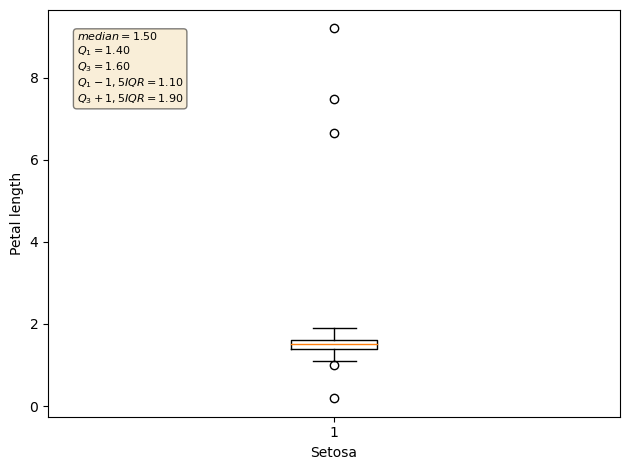

In [19]:
fig, ax = plt.subplots()

ax.boxplot(setosa_petallen.to_numpy())
Q1 = setosa_petallen.describe()['25%']
Q3 = setosa_petallen.describe()['75%']
IQR = Q3-Q1
textstr = '\n'.join((
    r'$median=%.2f$' % (setosa_petallen.median(), ),
    r'$Q_1=%.2f$' % (Q1, ), 
    r'$Q_3 =%.2f$' % (Q3,), 
    r'$Q_1-1,5IQR =%.2f$' % (Q1-1.5*(IQR)),
    r'$Q_3+1,5IQR =%.2f$' % (Q3+1.5*(IQR))))
ax.set_xlabel('Setosa')
ax.set_ylabel('Petal length')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
fig.tight_layout()
plt.show()

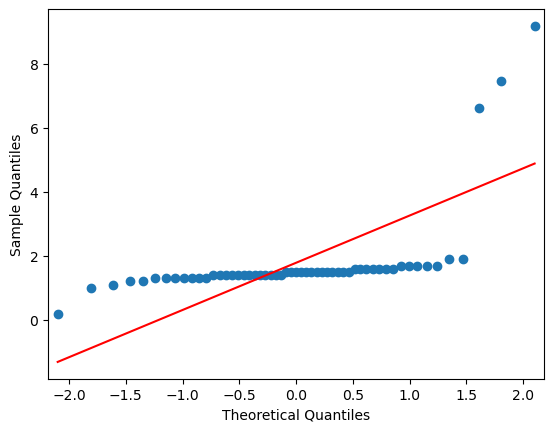

In [20]:
fig = sm.qqplot(setosa_petallen, line='s')
plt.show()

In [21]:
expected = norm(loc=outlier_mean, scale=outlier_std).rvs(size=55)
shapiro(setosa_petallen)

ShapiroResult(statistic=0.37847959995269775, pvalue=6.80499154747348e-14)

In [22]:
kstest(setosa_petallen, expected)

KstestResult(statistic=0.45454545454545453, pvalue=1.698257809883077e-05, statistic_location=1.7, statistic_sign=1)

In [23]:
chisquare(setosa_petallen.value_counts(), ddof=0, axis=0)

Power_divergenceResult(statistic=63.87272727272725, pvalue=1.0556358931874558e-08)

In [19]:
expected = norm(loc=outlier_mean, scale=outlier_std).rvs(size=55)
print(str(kstest(setosa_petallen, expected)))
print(str(shapiro(setosa_petallen)))
print(str(chisquare(f_obs=setosa_petallen.value_counts(), ddof=0, axis=None)))

KstestResult(statistic=0.32727272727272727, pvalue=0.005240054478222634, statistic_location=1.7, statistic_sign=1)
ShapiroResult(statistic=0.3940703272819519, pvalue=1.0241968677240226e-13)
Power_divergenceResult(statistic=63.87272727272725, pvalue=1.0556358931874558e-08)
